In [45]:
# Basic Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MultiLabelBinarizer

In [79]:
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')

In [80]:
x = ["listing_url","scrape_id","last_scraped","name","summary","space","description","experiences_offered",
     "neighborhood_overview", "notes","transit","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id",
    "host_url","host_name","host_since","host_location","host_about","host_thumbnail_url","host_picture_url",
    "host_neighbourhood","host_listings_count","host_total_listings_count","host_has_profile_pic","host_identity_verified",
    "street","neighbourhood","neighbourhood_cleansed","city","state","zipcode","market","smart_location","country_code",
    "country","is_location_exact","square_feet","weekly_price","monthly_price","security_deposit","cleaning_fee",
    "calendar_updated","has_availability","calendar_last_scraped","requires_license","license","jurisdiction_names",
     "instant_bookable","require_guest_profile_picture","require_guest_phone_verification","calculated_host_listings_count",
     "host_response_time", "first_review" , "last_review","reviews_per_month","host_verifications"]

listings = listings.drop(columns= x)


listings['host_response_rate'] = listings['host_response_rate'].str.replace("%", "").astype("float")
listings['host_response_rate'].fillna(listings['host_response_rate'].mean(),inplace = True)

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace("%", "").astype("float")
listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mean(),inplace = True)

listings['extra_people'] = listings['extra_people'].str.replace(",", "")
listings['extra_people'] = listings['extra_people'].str.replace("$", "").astype("float")

listings['price'] = listings['price'].str.replace(",", "")
listings['price'] = listings['price'].str.replace("$", "").astype("float")

listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mode()[0])
listings['beds'] = listings['beds'].fillna(listings['beds'].mode()[0])
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mode()[0])

reviewColumns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
for column in reviewColumns:
    listings[column].fillna(listings[column].mean(), inplace = True)
    

listings['host_is_superhost'].replace('f', 0 ,inplace=True)
listings['host_is_superhost'].replace('t', 1 ,inplace=True)
listings['host_is_superhost'] = listings['host_is_superhost'].fillna(0)



In [105]:
#amenitiesData= listings["amenities"].str.lower().str.replace('{','').str.replace('}','').str.replace('"','').str.replace(' ','_').str.split(",")
#amenitiesData.str.split()
#mlb = MultiLabelBinarizer()
#df =pd.DataFrame(mlb.fit_transform(amenitiesData),
#                          columns=mlb.classes_,
#                          index=amenitiesData.index)
#df = df.drop(columns = [''])
#from scipy import stats
#for d in df:
#    pb.append(stats.pointbiserialr(df[d],listings["price"]))
#    print(d + " :" + str(stats.pointbiserialr(df[d],listings["price"])))
    

24-hour_check-in :PointbiserialrResult(correlation=0.01745932921872076, pvalue=0.2807926972467129)
air_conditioning :PointbiserialrResult(correlation=0.1302705350741889, pvalue=6.411476704959703e-16)
breakfast :PointbiserialrResult(correlation=-0.10296541158116942, pvalue=1.8047106957117267e-10)
buzzer/wireless_intercom :PointbiserialrResult(correlation=0.03769700353616583, pvalue=0.01983990783508641)
cable_tv :PointbiserialrResult(correlation=0.23730939024074427, pvalue=5.049708355509422e-50)
carbon_monoxide_detector :PointbiserialrResult(correlation=0.05235893335287073, pvalue=0.0012104027943641692)
cat(s) :PointbiserialrResult(correlation=-0.09234501633904608, pvalue=1.0883998424864614e-08)
dog(s) :PointbiserialrResult(correlation=-0.045007454522251175, pvalue=0.005410700366256554)
doorman :PointbiserialrResult(correlation=0.12087156546684953, pvalue=6.696215142774261e-14)
dryer :PointbiserialrResult(correlation=0.12458929118618503, pvalue=1.1100785020713363e-14)
elevator_in_buildin

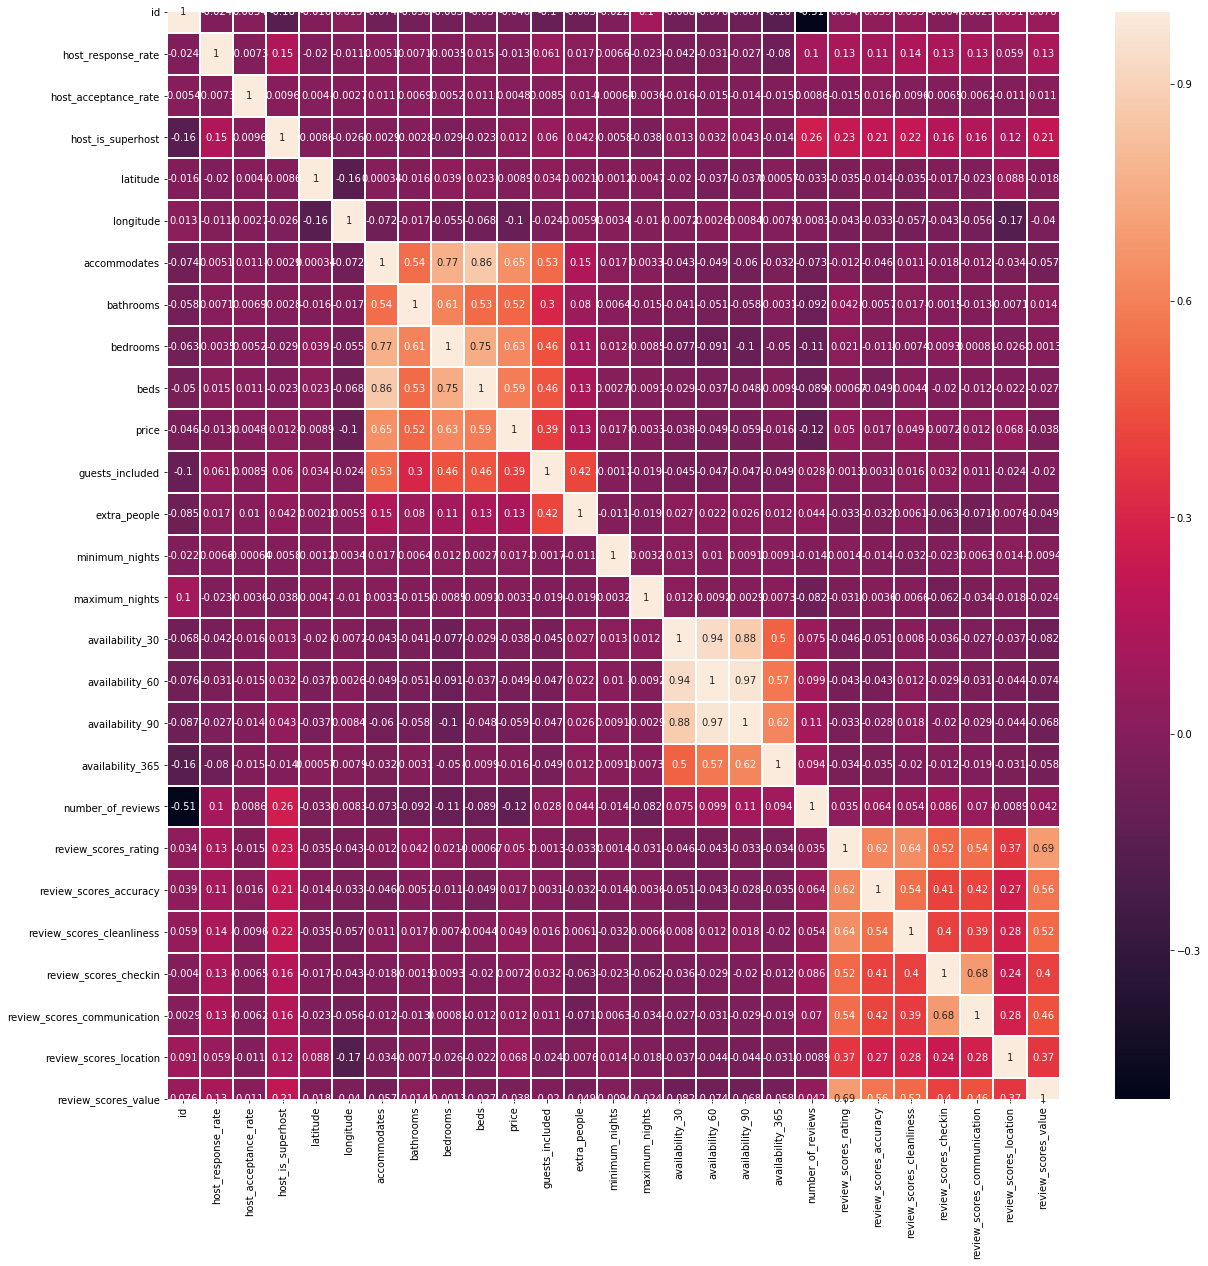

In [56]:
listingsCorr = listings.corr()
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(listingsCorr, linewidths = 1, annot = True, annot_kws = {"size": 10})